In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

input_file_path = "../data/"

# Data Load

In [2]:
data1 = np.load(input_file_path + "ps3_genetic_fingerprints.npy")
data2 = np.load(input_file_path + "ps3_patient_zet.npy")

In [3]:
data1.shape

(14398, 386)

In [4]:
data2.shape

(386,)

# Data Scaling

In [5]:
## add "ps3_patient_zet.npy" to "ps3_genetic_fingerprints.npy"
data1 = pd.DataFrame(data1)

data2 = pd.DataFrame(data2).T.rename({0: "target"}, axis='index')

data_merged = data1.append(data2)

In [7]:
scaler = preprocessing.MinMaxScaler()
data_merged = scaler.fit_transform(data_merged)
data_merged = pd.DataFrame(data_merged)

In [8]:
data_merged

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,0.328799,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.633360,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.815912,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.432141,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.330792,0.0,0.0,0.0
2,0.387313,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.214117,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.351591,0.0,0.0,0.0,0.0,0.0,0.0,0.126745,0.0,0.562098,...,0.0,0.198692,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.192242,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.415759,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.198500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.448567,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14395,0.242802,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.507797,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.137453,0.0,0.322953,...,0.0,0.495879,0.000000,0.0,0.0,0.0,0.335663,0.0,0.0,0.0
14397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.587334,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Data exploaration

## Collect zero columns and drop them

In [9]:
zero_col = []
two_value_col = []
three_value_col = []
for i in range(386):
    if len(data_merged[i].unique())==1:
        zero_col.append(i)
    if len(data_merged[i].unique())==2:
        two_value_col.append(i)
    if len(data_merged[i].unique())==3:
        three_value_col.append(i)

In [10]:
data_merged = data_merged.drop(zero_col, axis=1)

In [11]:
def preprocess_two_value_col(x):
    if x ==0:
        return 0
    else:
        return 1

In [12]:
for i in two_value_col:
    data_merged[i] = data_merged[i].apply(lambda x : preprocess_two_value_col(x))

In [13]:
data_merged

,0,2,3,4,6,7,9,11,12,13,...,374,375,376,377,378,379,381,382,383,384
0,0.328799,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.0,0.043172,...,0.0,0.740741,0.0,0.000000,0.633360,0,0.0,0.000000,0.0,0.0
1,0.815912,0.0,0.0,0.0,0,0.000000,0.432141,0.000000,0.0,0.000000,...,0.0,0.183758,0.0,0.000000,0.000000,0,0.0,0.330792,0.0,0.0
2,0.387313,0.0,0.0,0.0,0,0.000000,0.214117,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0,0.0,0.000000,0.0,0.0
3,0.351591,0.0,0.0,0.0,0,0.126745,0.562098,0.000000,0.0,0.000000,...,0.0,0.118353,0.0,0.198692,0.000000,0,0.0,0.000000,0.0,0.0
4,0.192242,0.0,0.0,0.0,0,0.000000,0.415759,0.000000,0.0,0.000000,...,0.0,0.043855,0.0,0.000000,0.000000,0,0.0,0.198500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14394,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.059381,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.448567,0,0.0,0.000000,0.0,0.0
14395,0.242802,0.0,0.0,0.0,0,0.000000,0.000000,0.062653,0.0,0.000000,...,0.0,0.439079,0.0,0.000000,0.507797,0,0.0,0.000000,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0,0.137453,0.322953,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.495879,0.000000,0,0.0,0.335663,0.0,0.0
14397,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.621922,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.587334,0,0.0,0.000000,0.0,0.0


(array([5851., 2596., 2217., 1161.,  538.,  693.,  721.,  465.,  142.,
          15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

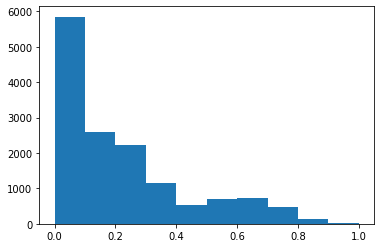

In [14]:
plt.hist(data_merged.iloc[:,58])

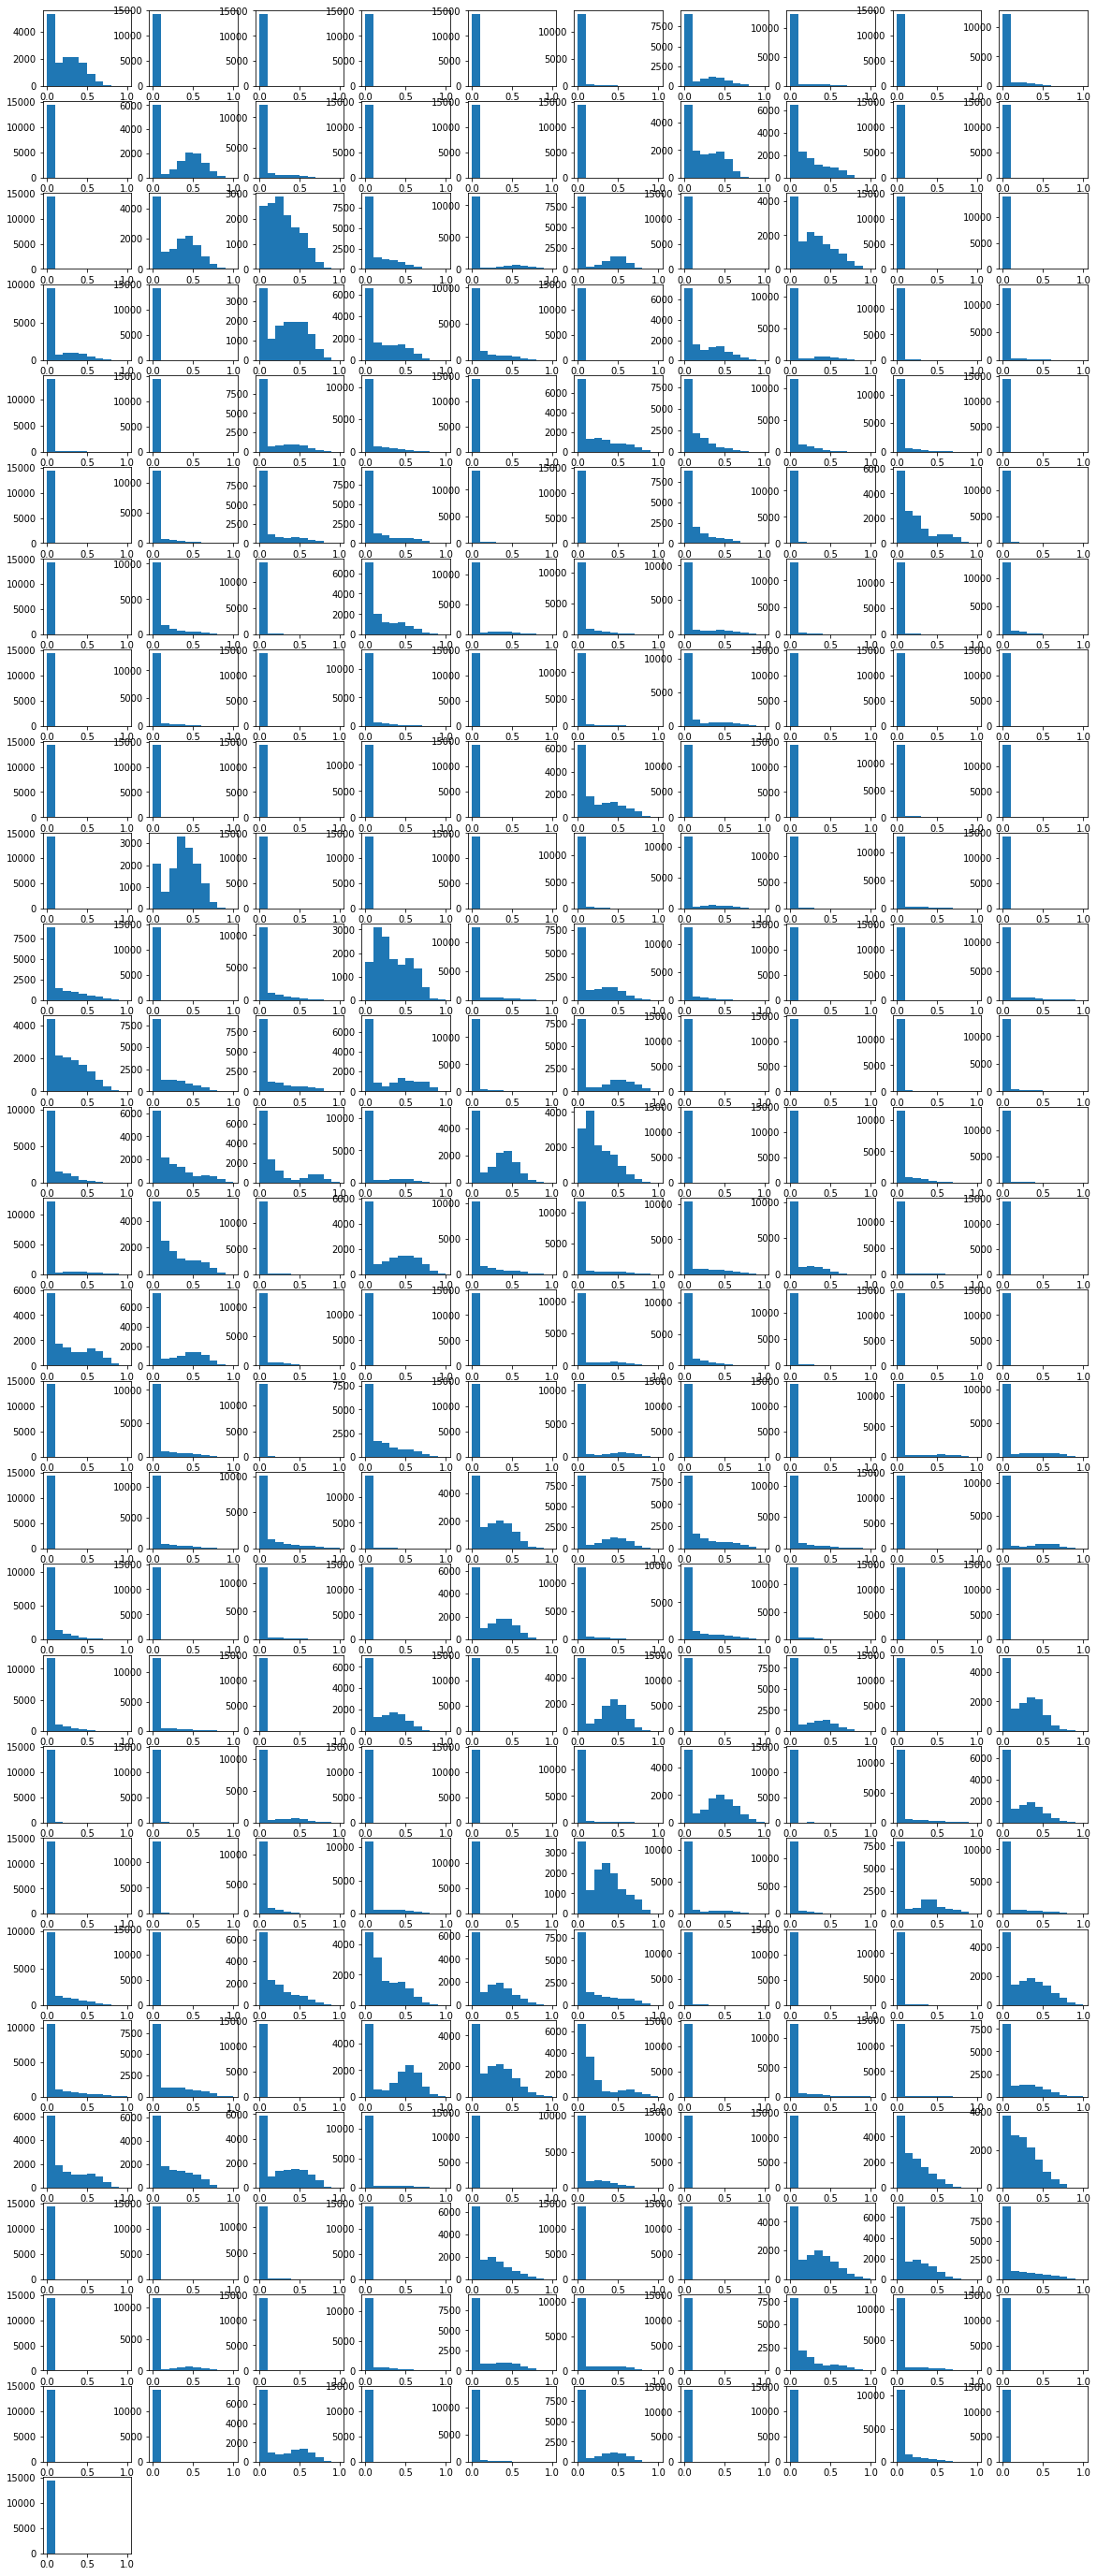

In [16]:
## histogram of all features
fig=plt.figure(figsize=(20, 50))
columns = 10
rows = 28
for i in range(columns*rows):
    if i < 271:
        fig.add_subplot(rows, columns, i+1)
        plt.hist(data_merged.iloc[:,i])

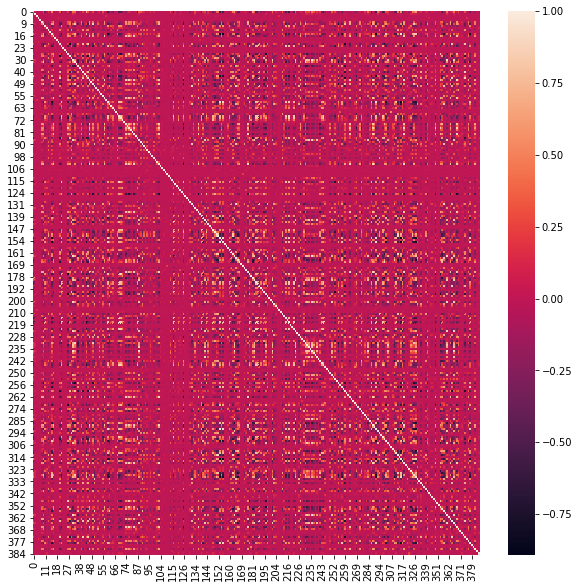

In [17]:
## correlation heatmap of data

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data_merged.corr())

#https://seaborn.pydata.org/generated/seaborn.heatmap.html

# drop columns with abs(corr)>0.8

In [18]:
corr_matrix = data_merged.corr()
corr_matrix.columns

Int64Index([  0,   2,   3,   4,   6,   7,   9,  11,  12,  13,
            ...
            374, 375, 376, 377, 378, 379, 381, 382, 383, 384],
           dtype='int64', length=271)

In [19]:
carry_list = []
for i in corr_matrix.columns:
    tmp = True
    for col in carry_list:
        if abs(corr_matrix[i][col])>0.8:
            tmp = False
    if tmp == True:
        carry_list.append(i)
    

In [20]:
data_merged = data_merged[carry_list]

In [21]:
## #dropped columns
271 - len(carry_list)

58

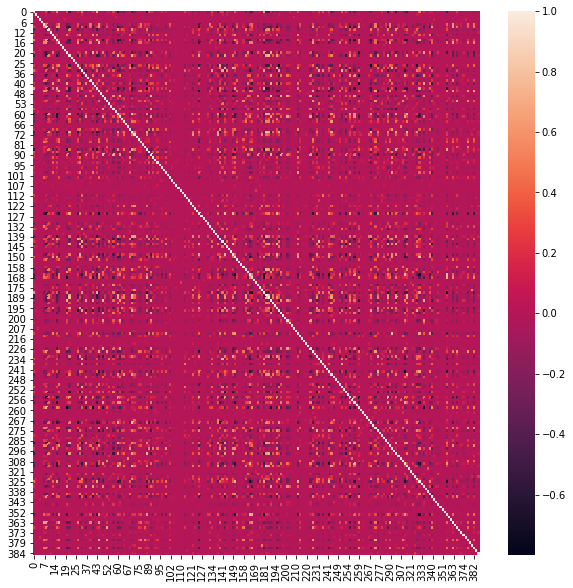

In [22]:
## correlation heatmap of data after dropping some columns.
## Less white and black cells! 

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data_merged.corr())

#https://seaborn.pydata.org/generated/seaborn.heatmap.html

# TSNE to reduce the dimension nonlinearly

In [23]:
data_embedded = TSNE(n_components=3).fit_transform(data_merged)

In [24]:
len(data_embedded)

14399

# Apply Kmeans and Calculate Silhouette_score for each k to use elbow method

In [25]:
def kmeans_sil(data,k):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(data)
    pca = PCA(n_components=2)
    pca.fit(data)
    transformed_data1 = pca.transform(data)
    return silhouette_score(data1, kmeans.labels_, metric='euclidean')

In [27]:
def wcss(data, k):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(data)
    return kmeans.inertia_

100%|██████████| 8/8 [01:05<00:00,  8.20s/it]


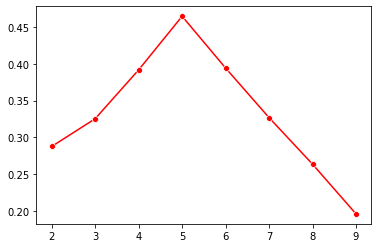

In [28]:
## calculate silhouette_score for each k and plot the score for each k
silhouette_list = []
for i in tqdm(range(2,10)):
    silhouette_list.append(kmeans_sil(data_merged.iloc[:-1,:],i))
sns.lineplot(range(2, 10), silhouette_list,marker='o',color='red')

In [29]:
silhouette_list

[0.28752905,
 0.32528162,
 0.39165613,
 0.4646126,
 0.39420012,
 0.32671744,
 0.26344454,
 0.19587322]

100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


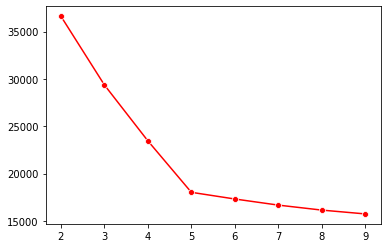

In [30]:
## calculate Within-Cluster-Sum-of-Squares(WCSS) for each k and plot the score for each k
wcss_list = []
for i in tqdm(range(2,10)):
    wcss_list.append(wcss(data_merged.iloc[:-1,:],i))
sns.lineplot(range(2, 10), wcss_list,marker='o',color='red')

In [44]:
wcss_list

[36622.98611416045,
 29361.881662408763,
 23450.25980224084,
 18013.27679819635,
 17306.75341134441,
 16661.258210180153,
 16134.068628984189,
 15730.51412566614]

In [31]:
def kmeans_vis(data,k):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(data)
    pca = PCA(n_components=2)
    pca.fit(data)
    transformed_data1 = pca.transform(data)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
    plt.scatter(transformed_data1[:,0], transformed_data1[:,1], c = [colors[label] for label in kmeans.labels_], s = 20)
    return silhouette_score(data1, kmeans.labels_, metric='euclidean')

0.4605814

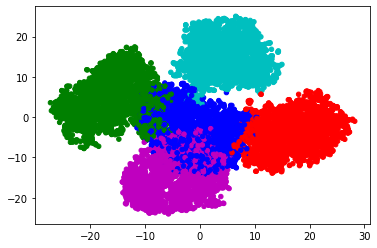

In [32]:
kmeans_vis(data_embedded[:-1,:], 5)

In [33]:
## #cluster = 5
# kmeans = KMeans(n_clusters = 5, random_state = 0).fit(data_merged.iloc[:-1,:])
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(data_embedded[:-1,:].astype('double'))

In [34]:
kmeans.labels_

array([2, 3, 0, ..., 2, 3, 1], dtype=int32)

In [35]:
# kmeans.predict([data_merged.iloc[-1,:]])
kmeans.predict([data_embedded[-1,:]])

array([4], dtype=int32)

In [36]:
a = enumerate(kmeans.labels_)
b = list(a)

In [37]:
Id = [i[0] for i in b]
predicted = [i[1] for i in b]
predicted_1 = []
for i in tqdm(range(len(predicted))):
    if predicted[i]==4:
        predicted_1.append(1)
    else:
        predicted_1.append(0)

100%|██████████| 14398/14398 [00:00<00:00, 124819.07it/s]


In [38]:
kmeans.cluster_centers_

array([[  4.47987802,  -9.67042783, -13.10604007],
       [ -5.61990343,   4.45513532,  15.25056194],
       [-14.90484967,  -3.96590324,  -3.8962556 ],
       [ 13.63720123,  -4.29155476,   8.03677645],
       [  3.53743024,  14.41400843,  -5.77469812]])

In [39]:
result =pd.DataFrame()

result["Id"] = Id

result["predicted"] = predicted_1

result = result.set_index("Id")

In [40]:
result.to_csv("../output/submission.csv")

In [41]:
## Scored F1 score 0.99280 in Kaggle

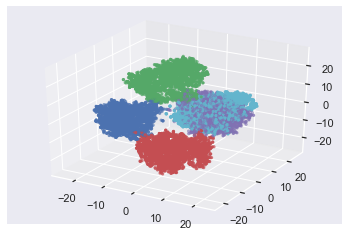

In [42]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data_embedded[:-1,0]
y = data_embedded[:-1,1]
z = data_embedded[:-1,2]

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
ax.scatter(x, y, z, c = [colors[i] for i in kmeans.labels_], marker = '.')

plt.show()
#https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/

In [43]:
## # of patients in the same cluster with patient Z.
predicted_1.count(1)

2800